In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
f = "/Users/birdy/Documents/eaps_research/gcm_analysis/gcm_data/darwin_weekly_seasonal/3d.nc"
ds = xr.open_dataset(f)
ds = ds.rename_dims({"Zmd000023":"Z"})
ds

<xarray.Dataset>
Dimensions:      (Z: 23, X: 360, Y: 160, T: 52)
Coordinates:
  * X            (X) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * Y            (Y) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * T            (T) datetime64[ns] 2008-11-15 2008-11-22 ... 2009-11-07
Dimensions without coordinates: Z
Data variables: (12/77)
    diag_levels  (Z) float64 ...
    iter         (T) int32 ...
    TRAC01       (T, Z, Y, X) float32 ...
    TRAC02       (T, Z, Y, X) float32 ...
    TRAC03       (T, Z, Y, X) float32 ...
    TRAC04       (T, Z, Y, X) float32 ...
    ...           ...
    TRAC70       (T, Z, Y, X) float32 ...
    PP           (T, Z, Y, X) float32 ...
    Nfix         (T, Z, Y, X) float32 ...
    Denit        (T, Z, Y, X) float32 ...
    pH           (T, Z, Y, X) float32 ...
    pCO2         (T, Z, Y, X) float32 ...
Attributes: (12/18)
    MITgcm_version:  checkpoint68b
    build_user:      stephdut
    build_host:      node080
    build_date:      Thu Aug 26 12:06:38 EDT 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

In [5]:
# sum biomass

# dset: xarray dataset or dataArray 
# variables: list of variables that exist in dset to be summed 
# new_name: what to call the new variable
# returns the dset with a new variable created with new_name and attributes
def ds_sum_variables(dset, variables, new_name, new_units="", new_description=""):
    c_total = dset[variables[0]]
    for var in variables[1:]:
        c_next = dset[var]
        c_total = c_total + c_next
    c_total = c_total.assign_attrs({'units':new_units, 'description': new_description})
    dset = dset.assign({new_name:c_total})
    return dset

biomass_vars = []
for i in range(21,70):
    biomass_vars.append(f"TRAC{i}")

In [6]:
ds = ds_sum_variables(ds, biomass_vars, "total_biomass")

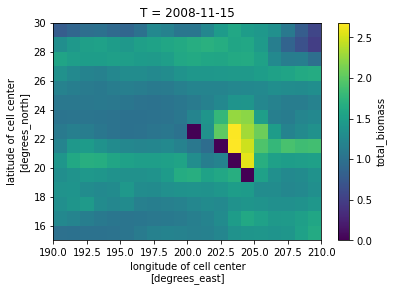

In [7]:
ds["total_biomass"].isel(T=0, Z=0).sel(X=slice(190, 210), Y=slice(15, 30)).plot()

In [46]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


/opt/anaconda3/envs/eaps-env/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


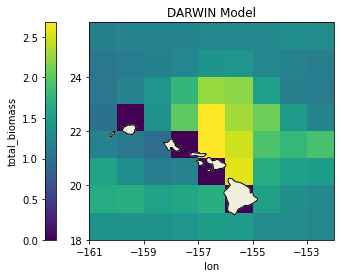

In [128]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

extent = [-161, -152, 18, 26]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds["total_biomass"].isel(T=0, Z=0).sel(X=slice(197, 208), Y=slice(18, 26)).plot(ax=ax, cbar_kwargs={'location':'left'})

ax.add_feature(cfeature.LAND, zorder=100)
ax.add_feature(cfeature.COASTLINE, color='black', zorder = 101)
ax.set_xticks(range(-161, -152, 2))
ax.set_yticks(range(18, 26, 2))
ax.set_xlabel('lon')
ax.set_ylabel(None)
ax.set_title("DARWIN Model")

plt.show()
